In [240]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import seaborn as sns
from sklearn.model_selection import train_test_split
import os
import matplotlib.ticker as mtick

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

import plotly.express as px
import plotly.graph_objects as go
from prophet import Prophet
import warnings
warnings.filterwarnings('ignore')



In [241]:
os.listdir(r'C:\Users\k\Desktop\Python1\Covid19_Analysis')

['.git', 'Covid19_Analysis.ipynb', 'Covid_19.csv']

In [242]:

Data=pd.read_csv(os.path.join('Covid_19.csv'))
Data.head()

Province/State Country/Region       Lat       Long        Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  2020-01-22          0   
1            NaN        Albania  41.15330  20.168300  2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600  2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800  2020-01-22          0   
4            NaN         Angola -11.20270  17.873900  2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa

In [243]:
Data.shape

(49068, 10)

In [244]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [245]:
Data.isna().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [246]:
Data.duplicated().sum()

np.int64(0)

In [247]:
Data=Data.drop('Province/State', axis=1)

In [248]:
Data.isna().sum()

Country/Region    0
Lat               0
Long              0
Date              0
Confirmed         0
Deaths            0
Recovered         0
Active            0
WHO Region        0
dtype: int64

In [249]:
Data['Date']= pd.to_datetime(Data['Date'])


In [250]:
Data.head()

Country/Region       Lat       Long       Date  Confirmed  Deaths  \
0    Afghanistan  33.93911  67.709953 2020-01-22          0       0   
1        Albania  41.15330  20.168300 2020-01-22          0       0   
2        Algeria  28.03390   1.659600 2020-01-22          0       0   
3        Andorra  42.50630   1.521800 2020-01-22          0       0   
4         Angola -11.20270  17.873900 2020-01-22          0       0   

   Recovered  Active             WHO Region  
0          0       0  Eastern Mediterranean  
1          0       0                 Europe  
2          0       0                 Africa  
3          0       0                 Europe  
4          0       0                 Africa

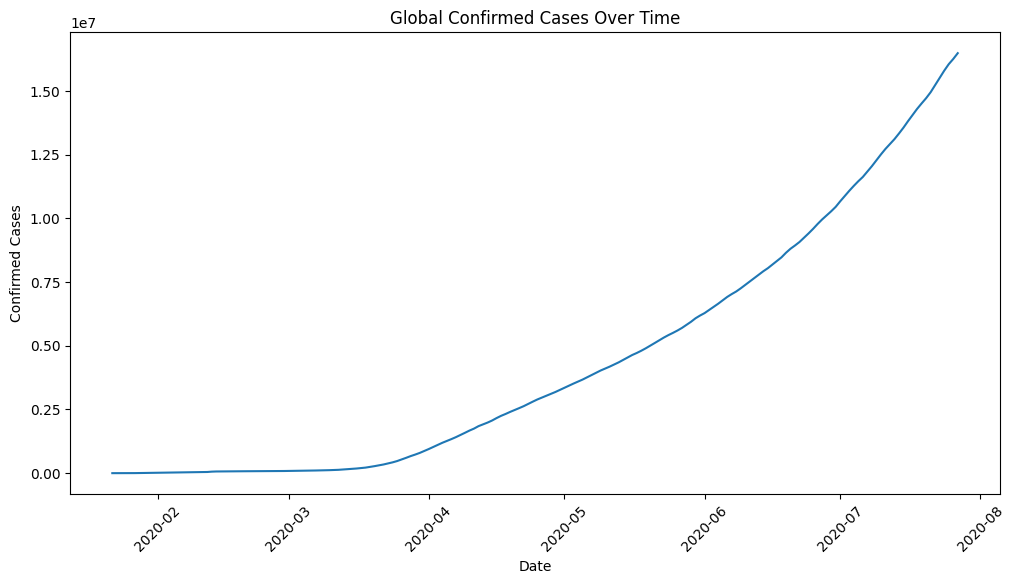

In [251]:
#Global Daily Trend
global_daily = Data.groupby('Date')[['Confirmed', 'Deaths', 'Active', 'Recovered']].sum().reset_index()


#plotting graph for Daily confirmed cases

plt.figure(figsize=(12,6))
plt.plot(global_daily['Date'], global_daily['Confirmed'])
plt.title("Global Confirmed Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.xticks(rotation=45)
plt.show()


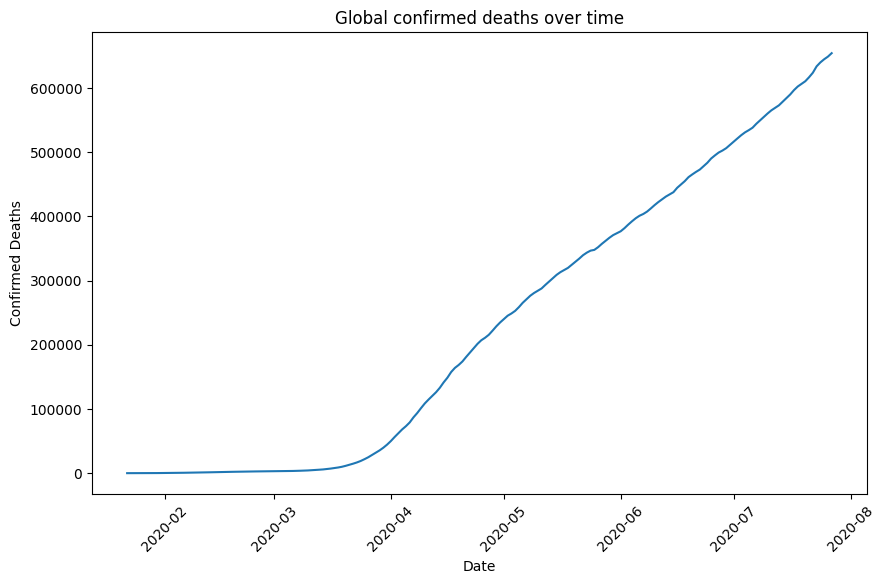

In [252]:
#plotting graph for Daily Deaths

plt.figure(figsize=(10,6))

plt.plot(global_daily['Date'], global_daily['Deaths'])
plt.title('Global confirmed deaths over time')
plt.xlabel('Date')
plt.ylabel('Confirmed Deaths')
plt.xticks(rotation=45)
plt.show()

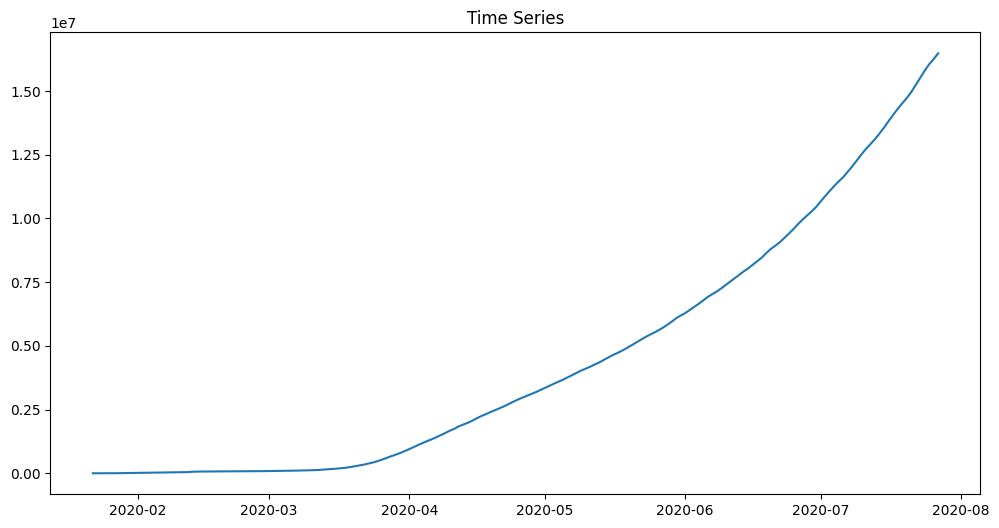

In [253]:
plt.figure(figsize=(12,6))
plt.plot(global_daily['Date'], global_daily['Confirmed'])
plt.title("Time Series")
plt.show()


In [254]:
#Plotting Top 10 countries with most active cases

latest_Date=Data['Date'].max()
latest_data=Data[Data['Date']==latest_Date]

top_10=latest_data.sort_values('Confirmed' ,ascending=False).head(10)
top_10

Country/Region        Lat        Long       Date  Confirmed  Deaths  \
49030              US  40.000000 -100.000000 2020-07-27    4290259  148011   
48835          Brazil -14.235000  -51.925300 2020-07-27    2442375   87618   
48936           India  20.593684   78.962880 2020-07-27    1480073   33408   
48992          Russia  61.524010  105.318756 2020-07-27     816680   13334   
49005    South Africa -30.559500   22.937500 2020-07-27     452529    7067   
48963          Mexico  23.634500 -102.552800 2020-07-27     395489   44022   
48986            Peru  -9.190000  -75.015200 2020-07-27     389717   18418   
48854           Chile -35.675100  -71.543000 2020-07-27     347923    9187   
49028  United Kingdom  55.378100   -3.436000 2020-07-27     300111   45759   
48938            Iran  32.427908   53.688046 2020-07-27     293606   15912   

       Recovered   Active             WHO Region  
49030    1325804  2816444               Americas  
48835    1846641   508116               Americas  
48936     951166   495499        South-East Asia  
48992     602249   201097                 Europe  
49005     274925   170537                 Africa  
48963     303810    47657               Americas  
48986     272547    98752               Americas  
48854     319954    18782               Americas  
49028          0   254352                 Europe  
48938     255144    22550  Eastern Mediterranean

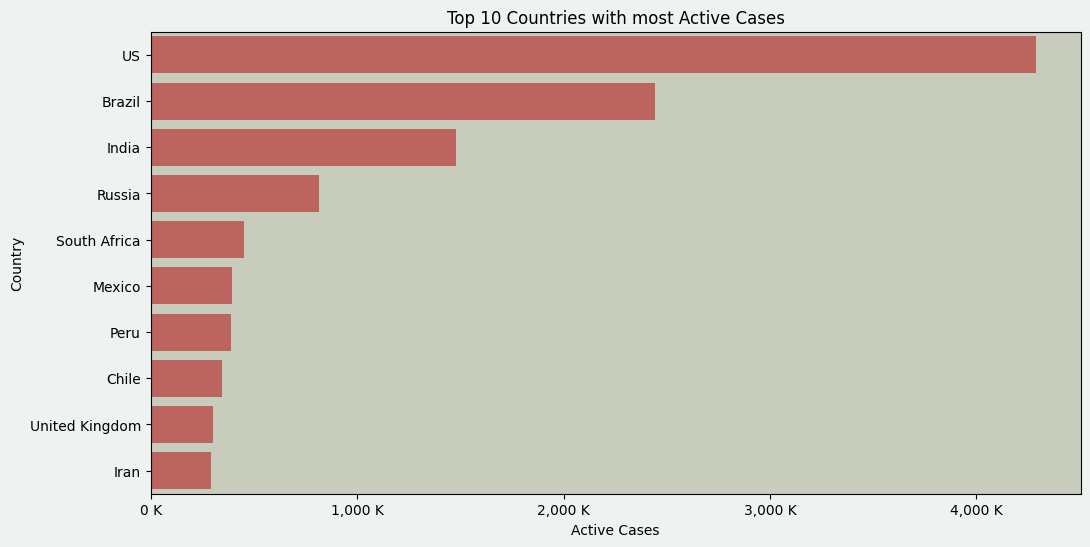

In [255]:
plt.figure(figsize=(12,6),facecolor="#6F97901D")

ax= sns.barplot(x='Confirmed', y='Country/Region', data=top_10, color='#CC574E')
ax.set_facecolor("#a6a88c83")

plt.title('Top 10 Countries with most Active Cases')
plt.xlabel('Active Cases')
plt.ylabel('Country')
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x,  pos: f'{x/1000:,.0f} K'))
plt.show()


World Spread over time


In [256]:

global_daily = Data.groupby(['Date', 'Country/Region'])[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

fig_map = px.choropleth(global_daily, locations="Country/Region", locationmode='country names',
                        color="Confirmed", hover_name="Country/Region", 
                        animation_frame=global_daily["Date"].dt.strftime('%Y-%m-%d'),
                        title="World Spread Over Time", color_continuous_scale=px.colors.sequential.Plasma)
fig_map.show()

In [257]:
# COUNTRY COMPARISON

p=px.line(global_daily, x="Date", y="Confirmed", color="Country/Region",
                  log_y=True, title="Confirmed Cases Comparison")

p.show()

In [258]:
# MORTALITY RATE ANALYSIS

latest_data['Death_Rate'] = latest_data['Deaths'] / latest_data['Confirmed']
latest_data['Death_Rate'] = latest_data['Death_Rate'].fillna(0)

top_mortality = latest_data.sort_values('Death_Rate', ascending=False).head(10)


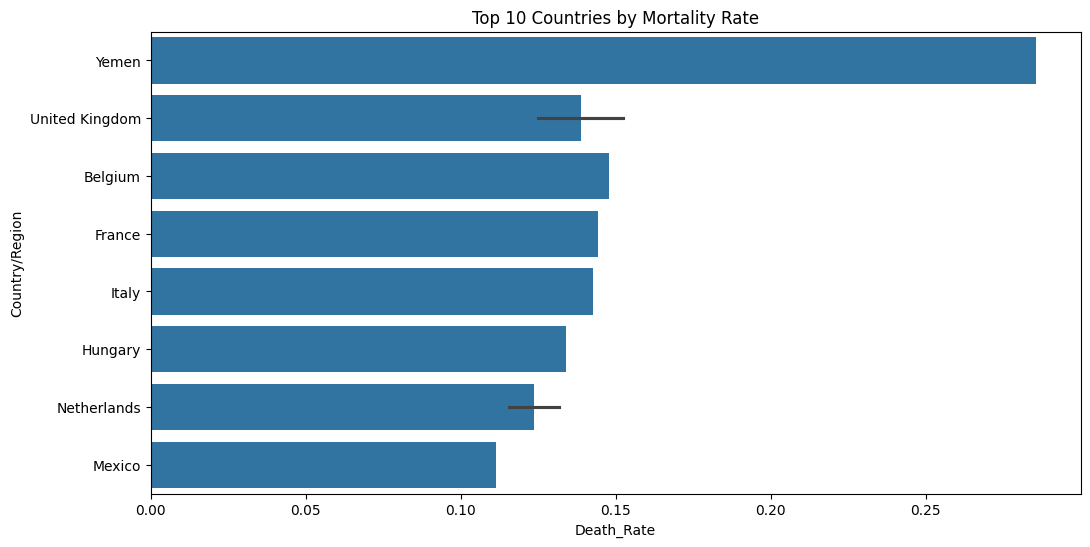

In [259]:
plt.figure(figsize=(12,6))

sns.barplot(x='Death_Rate', y='Country/Region', data=top_mortality)
plt.title("Top 10 Countries by Mortality Rate")
plt.show()



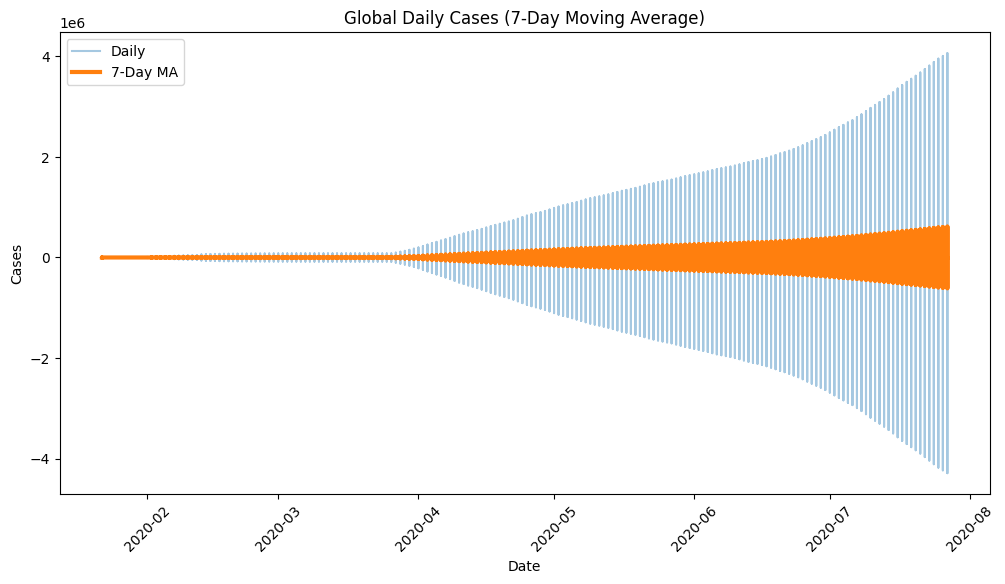

In [260]:
global_daily['Daily_New'] = global_daily['Confirmed'].diff()
global_daily['7D_MA'] = global_daily['Daily_New'].rolling(7).mean()

plt.figure(figsize=(12,6))
plt.plot(global_daily['Date'], global_daily['Daily_New'], alpha=0.4, label='Daily')

plt.plot(global_daily['Date'], global_daily['7D_MA'], linewidth=3, label='7-Day MA')
plt.title("Global Daily Cases (7-Day Moving Average)")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.legend()
plt.xticks(rotation=45)
plt.show()


Global COVID-19 Trends


In [261]:
fig = px.line(
    global_daily,
    x='Date',
    y=['Confirmed','Deaths','Recovered'],
    title="Global COVID-19 Trends"
)

fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Cases",
    hovermode="x unified"
)

fig.show()


In [262]:


Global_Daily= Data.groupby('Date')['Confirmed'].sum().reset_index()

Global_Daily['Date'] = pd.to_datetime(Global_Daily['Date'])  # ensure datetime
Global_Daily.set_index('Date', inplace=True)



In [263]:
series= Global_Daily['Confirmed']

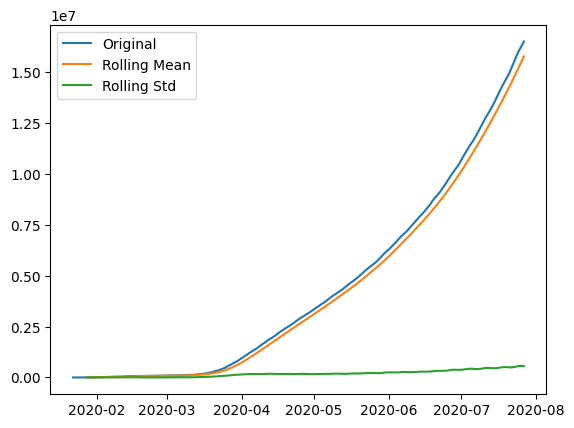

In [264]:
rolling_mean = series.rolling(7).mean()
rolling_std = series.rolling(7).std()

plt.figure()
plt.plot(series, label="Original")
plt.plot(rolling_mean, label="Rolling Mean")
plt.plot(rolling_std, label="Rolling Std")
plt.legend()
plt.show()


In [265]:
#: Stationarity Tests (Before Fixing)

#ADF TEST

from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(series)
print("ADF p-value:", adf_result[1])


ADF p-value: 0.9987419829144141


In [266]:
#KPSS TEST 
from statsmodels.tsa.stattools import kpss

kpss_result = kpss(series)
print("KPSS p-value:", kpss_result[1])


KPSS p-value: 0.01


After running ADF and KPSS test we see that our data is not stationary


Transformation (Variance Stabilization)

In [267]:
log_series = np.log(series + 1)


Detrending via Differencing

In [268]:
diff_series = log_series.diff().dropna()  #Removes trend, Mean becomes stable


Remove Seasonality (If Present)

In [269]:
seasonal_diff = diff_series.diff(7).dropna()


Stationarity Tests (After Fixing)

In [270]:
adf_result = adfuller(seasonal_diff)
kpss_result = kpss(seasonal_diff)

print("ADF p-value:", adf_result[1])
print("KPSS p-value:", kpss_result[1])


ADF p-value: 0.013407499503077744
KPSS p-value: 0.04308290175049123


After making our Data stationary we see, Series is now stationary

ACF & PACF (Model Identification)

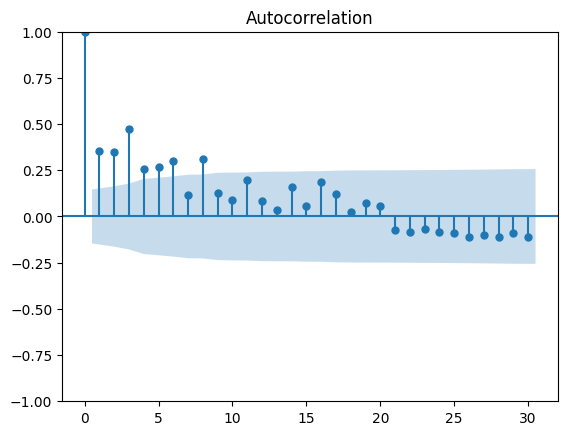

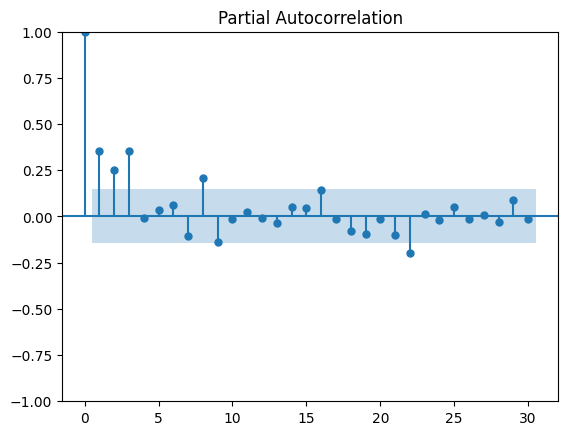

In [271]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(seasonal_diff, lags=30)
plot_pacf(seasonal_diff, lags=30)
plt.show()


In [272]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(
    log_series,
    order=(1,1,1),
    seasonal_order=(1,1,1,7)
)

results = model.fit()
print(results.summary())


                                     SARIMAX Results                                     
Dep. Variable:                         Confirmed   No. Observations:                  188
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood                 279.235
Date:                           Fri, 06 Feb 2026   AIC                           -548.471
Time:                                   02:17:47   BIC                           -532.506
Sample:                               01-22-2020   HQIC                          -541.998
                                    - 07-27-2020                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9997      0.016     62.770      0.000       0.968       1.031
ma.L1         -0.8310      0.040    -20.597

In [273]:
forecast = results.forecast(steps=30)

# Inverse log transform
forecast = np.exp(forecast)


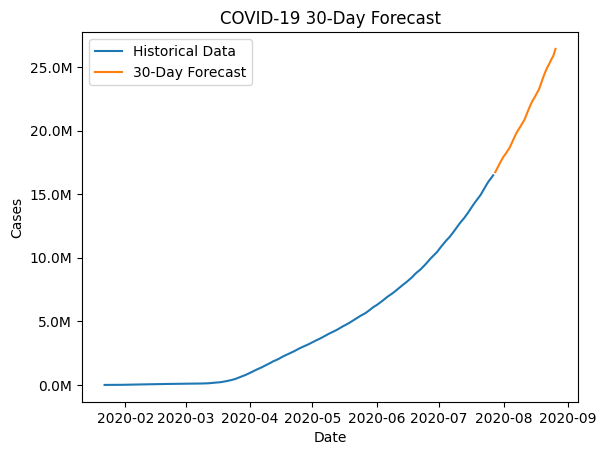

In [274]:
# Forecast 30 days
forecast = results.forecast(steps=30)

# Reverse log transform
forecast = np.exp(forecast)

# Plot
plt.figure()
plt.plot(series, label="Historical Data")
plt.plot(forecast, label="30-Day Forecast")

plt.gca().yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
)


plt.legend()
plt.title("COVID-19 30-Day Forecast")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.show()


In [275]:

fig = go.Figure()

# Historical Data
fig.add_trace(go.Scatter(
    x=series.index,
    y=series,
    mode='lines',
    name='Historical Data'
))

# Forecast Data
fig.add_trace(go.Scatter(
    x=forecast.index,
    y=forecast,
    mode='lines',
    name='30-Day Forecast'
))

fig.update_layout(
    title="COVID-19 30-Day Forecast",
    xaxis_title="Date",
    yaxis_title="Cases",
    hovermode="x unified"
)

fig.show()
